In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1.) Import Data from FRED

In [29]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [30]:
data.index = pd.to_datetime(data.index)

In [31]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.48
1947-02-01,NaN,NaN,NaN,21.62
1947-03-01,NaN,NaN,NaN,22.00
1947-04-01,NaN,NaN,NaN,22.00
1947-05-01,NaN,NaN,NaN,21.95


In [32]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [33]:
split1 = int(len(data) * .6)
split2 = int(len(data) * .9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [35]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [36]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [41]:
model1 = sm.OLS(y_in, X_in).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        15:02:54   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529

# 4.) Recreate the graph fro your model

In [ ]:
import matplotlib.pyplot as plt

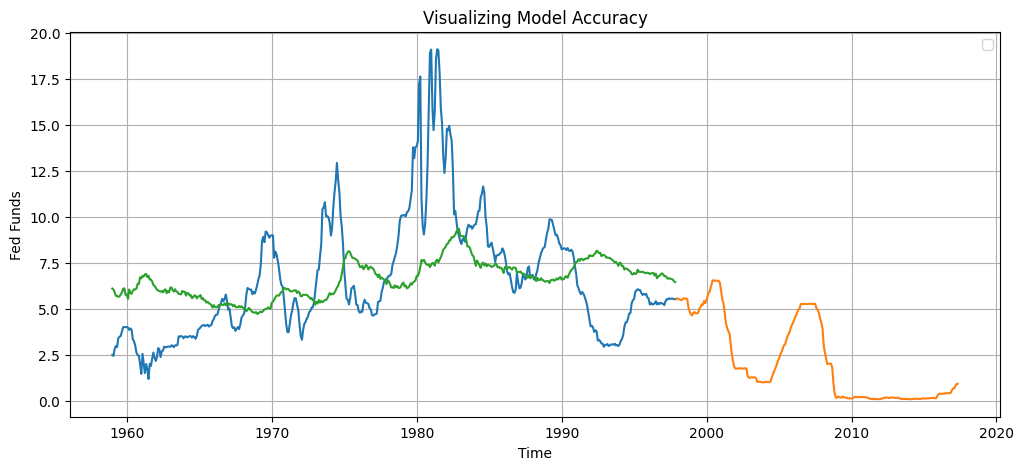

In [38]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in,))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [44]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
max_degrees = 3

DEGREE :  1


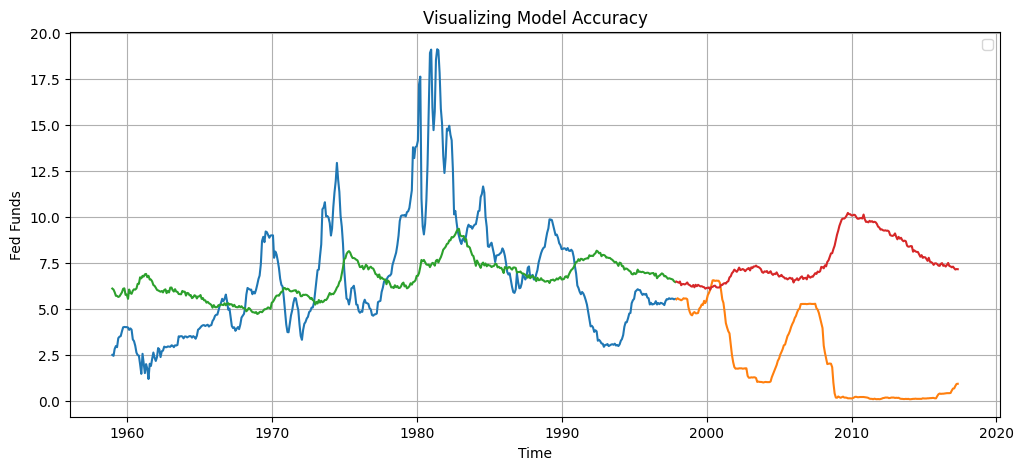

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566782
DEGREE :  2


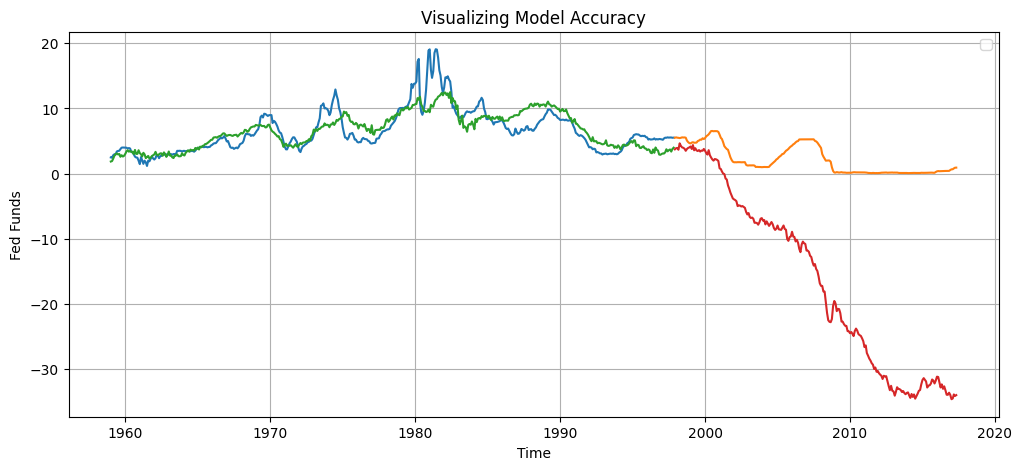

Insample MSE :  3.8634771392760685
Outsample MSE :  481.4465099294859
DEGREE :  3


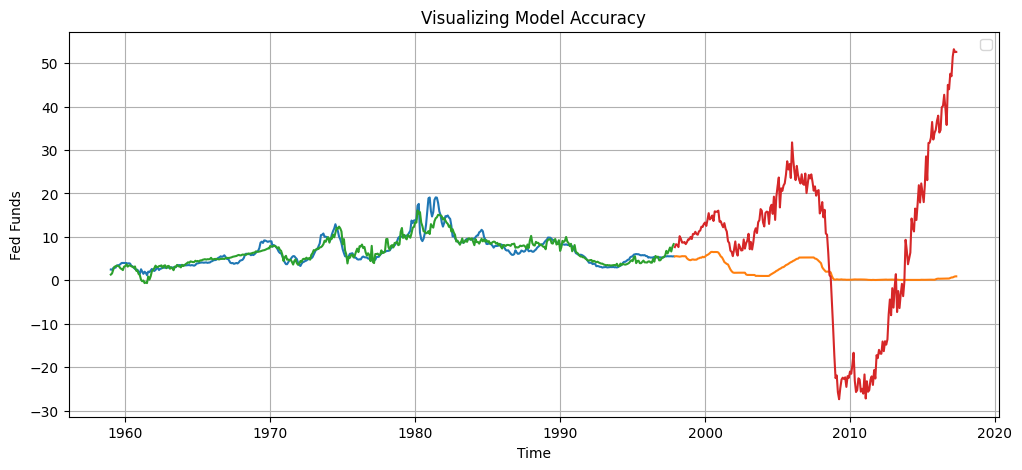

Insample MSE :  1.872363626650649
Outsample MSE :  371.76804093810324


In [76]:
for degrees in range (1, max_degrees + 1):
    print ("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree =degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))
    
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(data_in.index,model1.predict(X_in_poly))
    plt.plot(data_out.index,model1.predict(X_out_poly))
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ",in_mse_1)
    print("Outsample MSE : ",out_mse_1)

# 7.) State your observations :

The in-sample MSE tends to drop with increasing polynomial degree, suggesting better fit to the training set.
Higher polynomial degrees, however, may not always translate into improved out-of-sample results. Indeed, overfitting and greater out-of-sample MSE are frequently the results of it.
A trade-off must be made between how well the model fits the training set and how well it generalizes to untested data when determining the polynomial degree. The exact issue at hand, the available information, and the bias vs. variance trade-off you are ready to take will all influence the optimal degree.
Since none of the models in this instance seem to be performing very well on data that is outside of the sample, it is possible that additional model selection or regularization strategies will be required to enhance generalization.